In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print('Number of siblings / spouses aboard the Titanic: ',data.SibSp.unique())
print('Ports of Embarkation: ',data.Embarked.unique())

Number of siblings / spouses aboard the Titanic:  [1 0 3 4 2 5 8]
Ports of Embarkation:  ['S' 'C' 'Q' nan]


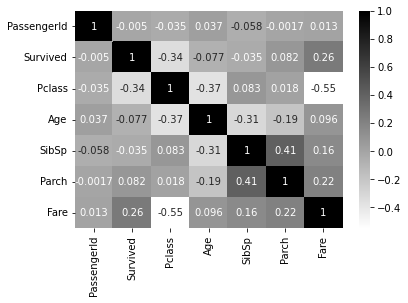

In [7]:
cor = data.corr()
sns.heatmap(cor, annot=True,cmap='gist_yarg')

In [8]:
# ADDTIONAL STARTS HERE:
x_add = data.drop(['Survived'],axis=1)
y_add = data.Survived

In [9]:
# According to the above plot Columns SibSp, Sex and PassengerId are least important so we drop these columns
x_add = x_add.drop(['Name','Ticket','Cabin'], axis=1)
x_add = x_add.set_index('PassengerId', drop=True)
x_add.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [10]:
x_add.Sex = x_add.Sex.astype('category').cat.codes
x_add.Embarked = x_add.Embarked.astype('category').cat.codes

In [11]:
x_add['Age'].fillna(int(x_add['Age'].mean()), inplace=True)
x_add['Embarked'].fillna(int(x_add['Embarked'].mean()), inplace=True)

In [12]:
x_add.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


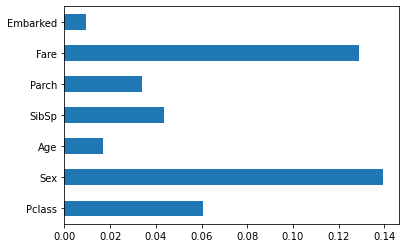

In [14]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(x_add,y_add)
feat_importance = pd.Series(importance,x_add.columns[0:len(x_add.columns)])
feat_importance.plot(kind='barh')
plt.show()

In [15]:
# According to the above plot Columns Embarked and Age are least important so we drop these columns
x_add = x_add.drop(['Embarked','Age'], axis=1)
x_add.head()

,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,
1,3,1,1,0,7.2500
2,1,0,1,0,71.2833
3,3,0,0,0,7.9250
4,1,0,1,0,53.1000
5,3,1,0,0,8.0500


In [16]:
Xadd_train, Xadd_test, yadd_train, yadd_test = train_test_split(x_add, y_add, test_size=0.2, random_state=42)

In [17]:
clf = LogisticRegression(random_state=0,max_iter = 250).fit(x_add, y_add)

In [19]:
clf.score(Xadd_train, yadd_train)

0.797752808988764

In [22]:
yadd_pred = clf.predict(Xadd_test)

In [23]:
print(classification_report(yadd_test, yadd_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [25]:
print(roc_auc_score(yadd_test, yadd_pred))

0.7751608751608752


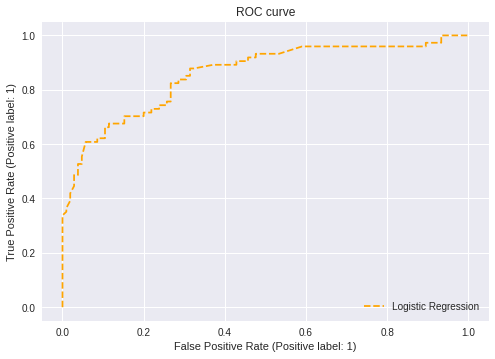

In [26]:
plt.style.use('seaborn')
# plt.figure(figsize=(50, 50))
metrics.plot_roc_curve(clf, Xadd_test, yadd_test,linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
plt.show()

In [27]:
# Ends here

In [28]:
data = data.drop(['Name','Ticket','Cabin'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [29]:
print('Duplicate elements: ',data.duplicated().sum())

Duplicate elements:  0


In [30]:
print('Null values in Data:\n',data.isnull().sum())

Null values in Data:
 PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [31]:
data.Sex = data.Sex.astype('category').cat.codes
data.Embarked = data.Embarked.astype('category').cat.codes

In [32]:
data['Age'].fillna(int(data['Age'].mean()), inplace=True)
data['Embarked'].fillna(int(data['Embarked'].mean()), inplace=True)

In [33]:
print('Null values in Data after preprocessing:\n',data.isnull().sum())

Null values in Data after preprocessing:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [34]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [35]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.560236,0.523008,0.381594,32.204208,1.529742
std,257.353842,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,49.693429,0.800254
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [36]:
data.Age = MinMaxScaler().fit_transform(np.array(data.Age).reshape(-1,1))
data.Fare = MinMaxScaler().fit_transform(np.array(data.Fare).reshape(-1,1))

In [37]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0.271174,1,0,0.014151,2
1,2,1,1,0,0.472229,1,0,0.139136,0
2,3,1,3,0,0.321438,0,0,0.015469,2
3,4,1,1,0,0.434531,1,0,0.103644,2
4,5,0,3,1,0.434531,0,0,0.015713,2


In [38]:
x = data.drop(['Survived'],axis=1)
y = data.Survived

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
clf = LogisticRegression(random_state=0,max_iter = 250).fit(X_train, y_train)

In [47]:
clf.score(X_train, y_train)

0.8117977528089888

In [48]:
y_pred = clf.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [50]:
print(roc_auc_score(y_test, y_pred))

0.7703989703989704


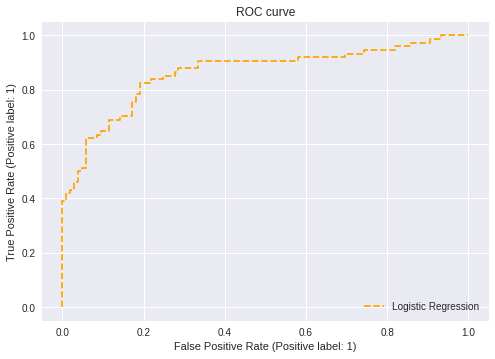

In [51]:
plt.style.use('seaborn')
# plt.figure(figsize=(50, 50))
metrics.plot_roc_curve(clf, X_test, y_test,linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
plt.show()